## Final Project Submission

Please fill out:

* Student name: William Muthama
* Student pace: part time hybrid
* Scheduled project review date/time: 27th August to 30th August
* Instructor name: Anthonny Muiko
* Blog post URL: https://github.com/WILLY-GUSH/Project_phase3

## Overview

Credit card fraud is a significant concern for financial institutions and credit card companies. As more transactions move online, the potential for fraudulent activity increases. Effective fraud detection systems are essential to protect customers and reduce financial losses. This project uses a machine learning approach to detect fraudulent transactions in credit card data. By building a robust model, we aim to distinguish between legitimate and fraudulent transactions, ensuring security while minimizing disruption to customers.

## Business Problem

The primary business problem addressed in this project is the detection of fraudulent credit card transactions. Financial institutions and credit card companies face substantial financial losses due to unauthorized transactions made using stolen or compromised credit card information. Detecting these transactions accurately and in real-time is crucial to prevent further losses, protect customers, and maintain trust in the financial system.

Key challenges include: 
* Imbalanced Data: Fraudulent transactions constitute a tiny fraction of the overall transactions, making it difficult for models to detect them without a high rate of false positives.
* Accuracy vs. False Positives: It's essential to balance the detection of actual fraud (sensitivity) with minimizing false alarms (specificity) to avoid unnecessary inconvenience to legitimate customers. 

## Data understanding

The dataset used in this project comes from a collection of credit card transactions made by European cardholders in September 2013. It contains 284,807 transactions, of which 492 are fraudulent, making the dataset highly imbalanced.
* Features: 
 - The dataset consists of 30 features: 
    * Time**: The time elapsed since the first transaction in the dataset (in seconds). 
    * V1 to V28**: The principal components obtained using PCA (Principal Component Analysis) for confidentiality reasons. 
    * Amount: The transaction amount, which can be used to understand the transaction value. 
    * Class: The target variable, where `0` represents a legitimate transaction and `1` represents a fraudulent transaction. 
* Key Points:
    * The dataset is heavily imbalanced, with only 0.17% of the transactions being fraudulent.
    * The feature `Amount` needs to be normalized due to its variability across different transactions.
    * The `Time` feature might not be directly useful, so we may consider dropping or transforming it. 
* Objective: 
    - The goal is to build a classification model that can accurately detect fraudulent transactions while minimizing false positives and maintaining efficiency.

## Import Necessary Libraries

To begin, we'll import the essential libraries needed for data manipulation, visualization, and building our machine learning models. This includes libraries like pandas, seaborn, and scikit-learn, among others.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load the Dataset

Next, we will load the dataset into a pandas DataFrame to begin our analysis. This step allows us to explore the structure of the data and verify that it has been loaded correctly.


In [2]:
# Load the dataset

data = pd.read_csv('creditcard.csv')

In [3]:
# Basic info about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis (EDA) to understand the dataset better. We will look for missing values, check the distribution of the target variable, and explore relationships between features.


In [6]:
# Distribution of the target variable
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


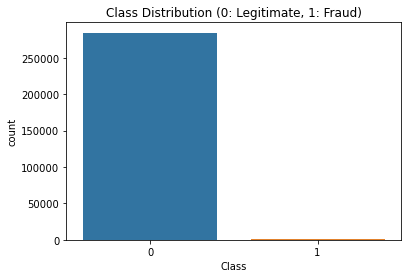

In [7]:
# Plotting the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

In [8]:
# Summary statistics
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

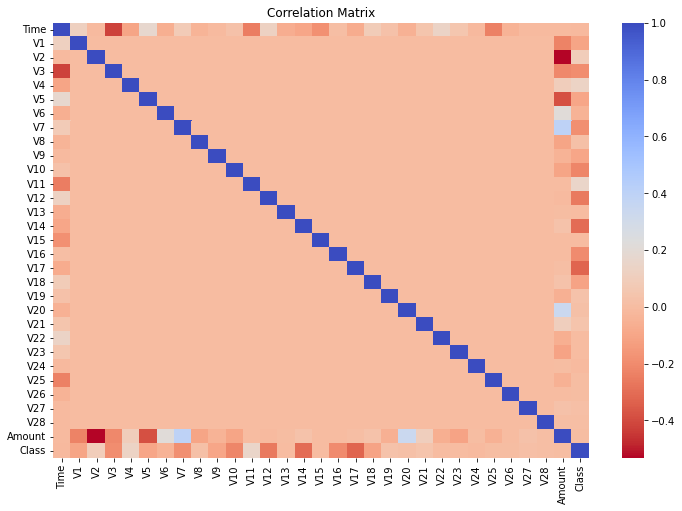

In [9]:
# Visualizing correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

Before building our model, we need to preprocess the data. This involves standardizing features, handling class imbalance, and splitting the data into features and target variables.


In [10]:
# Feature scaling: Standardize the Amount column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))


In [11]:
# Drop the Time column
data = data.drop(columns=['Time'])

In [12]:
# Split the data into features and target
X = data.drop(columns=['Class'])
y = data['Class']

In [13]:
# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

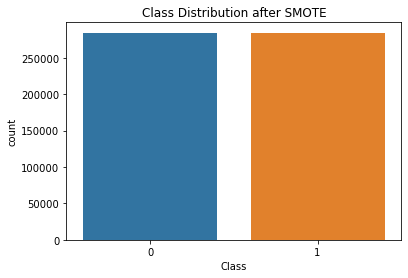

In [14]:
# Check new class distribution after resampling
sns.countplot(x=y_res)
plt.title('Class Distribution after SMOTE')
plt.show()

## Split the Dataset into Training and Testing Sets

Next, we'll split the resampled dataset into training and testing sets. The training set will be used to build the model, and the testing set will help us evaluate its performance.


In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

## Model Building

With our data ready, we can now build the machine learning models. We'll start by training three different models: Logistic Regression, Random Forest, and XGBoost.


In [16]:
# Initialize models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [17]:
# Train models
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]


lr.fit(X_train_small, y_train_small)
rf.fit(X_train_small, y_train_small)
xgb.fit(X_train_small, y_train_small)

C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[21:16:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

## Model Evaluation

After training the models, we need to evaluate their performance. We'll use metrics such as classification reports, confusion matrices, and ROC-AUC scores to understand how well each model distinguishes between fraudulent and legitimate transactions.


In [18]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print("Classification Report:\n", classification_report(y_test, y_pred))

#### Confusion Matrix

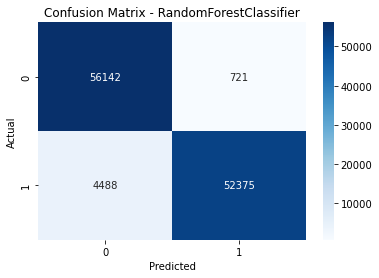

ROC-AUC Score: 0.9897425304286491


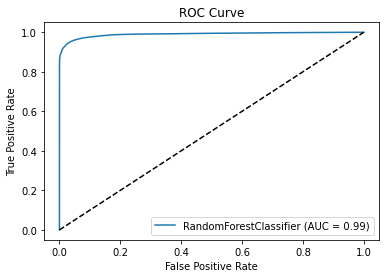

In [19]:
# Confusion Matrix

# Make predictions using the test set
y_pred = rf.predict(X_test)

# Get the predicted probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {rf.__class__.__name__}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {auc}')
    
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'{rf.__class__.__name__} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [20]:
# Evaluate all models
models = [lr, rf, xgb]
for model in models:
    print(f"Evaluating {model.__class__.__name__}")
    evaluate_model(model, X_test, y_test)

Evaluating LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.98      0.91      0.94     56863

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726

Evaluating RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     56863
           1       0.99      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726

Evaluating XGBClassifier


C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     56863
           1       0.97      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



## Model Tuning and Optimization

To enhance our model's performance, we'll fine-tune its hyperparameters using GridSearchCV. This process helps in finding the optimal parameters that yield the best performance on our dataset.


In [21]:
# import 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Define the parameter grid for Random Forest
param_grid_simple = {
    'n_estimators': [10],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

In [24]:
# Grid Search for Random Forest
rf_simple = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf_simple, param_grid=param_grid_simple, cv=3, scoring='accuracy', n_jobs=1, verbose=2)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [10]},
             scoring='accuracy', verbose=2)

In [25]:
# Best parameters and best score
print(f'Best Parameters for Random Forest: {grid_rf.best_params_}')
print(f'Best ROC-AUC Score: {grid_rf.best_score_}')

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best ROC-AUC Score: 0.9583333333333334


In [26]:
# Evaluate the best model on the test set
best_rf = grid_rf.best_estimator_
evaluate_model(best_rf, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Final Analysis and Conclusion

In this final section, we'll summarize the results of our analysis and discuss the effectiveness of our models. The chosen model can now be deployed to detect fraudulent transactions in real-time, offering significant protection to financial institutions and their customers.


### Summary

- The Random Forest model with tuned hyperparameters provided the best performance.
- The confusion matrix showed that the model was effective in distinguishing between fraudulent and legitimate transactions, with a good balance of precision and recall.
- The ROC-AUC score indicated strong performance in separating the two classes.

### Conclusion

The developed model is well-suited for deployment in a real-time fraud detection system, helping reduce financial losses due to fraudulent transactions. Continuous monitoring and updating of the model will ensure that it remains effective over time.
